In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
from functions.run import *
from IPython.display import Audio, display, HTML
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
display(HTML("<style>.container { width:100% !important; }</style>"))

# Simulation 5

This simulation compares the LMS algorithm with a frequency domain implementation FLMS).   
You can think about this algorithm as running NLMS separately for each bin of a framewise DFT of the input signal.   
It has to be NLMS because the FLMS algorithm requires a normalization of each bin with its periodogram value to be stable.   
This however offers the advantage of frequency-dependent effective learning rates.
The FLMS algorithms does a frequency domain filtering using the Overlap-Save algorithm with an FFT size called $C$ and an input block size called $L$.   
Another advantage is that the implementation is usually faster.

#### The input signal
White noise is filtered with an all-pole filter of order 16. This constitutes an autoregressive process.   
This is done with the intention of mimicing the statistical properties of a speech signal.
The all-pole filter coefficients were obtained by an LPC analysis of a recording of the /e/ phone.   
   
Using white-noise input for the synthesis recreates this phone in an unvoiced manner (e.g. whispering):

In [4]:
# The filename suggests that the source signal of the coefficients
# had a sample rate of 16 kHz.
lpc_coefficients = np.genfromtxt('./coefficients/ar_koff16.csv', delimiter=',')[1]
v_n = np.random.randn(16000)
s_n = sig.lfilter(b=[1], a=lpc_coefficients, x=v_n)
s_n /= (0.5*np.max(np.abs(s_n)))

In [5]:
# Ipython.display.Audio seems to have a bug where signals are played back with double the rate...
# If the duration seems to be way off, rerun this cell.
# Think about someone whispering the /e/ sound!
Audio(s_n, rate=16000//2)

#### The desired signal:

The system impulse response to be estimated is an IIR room impulse response (rir) measured in a seminar room of a university.   
The coefficients are the values of the impulse response which is trimmed to a length of either 700 or 1500 time steps.

<IPython.core.display.Javascript object>


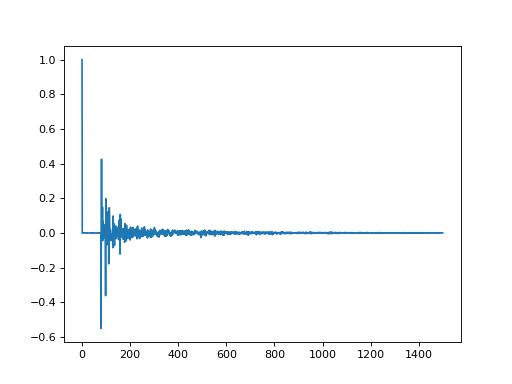

In [6]:
h_rir = np.concatenate(([1], np.genfromtxt('./coefficients/w_system_1500.csv', delimiter='\n')[1:]))

display(Audio(h_rir, rate=8000))
plt.plot(h_rir);

The speech signal is filtered with this rir to create reverberated speech.
**After** reverberation, AWGN is added to create noisy, reverberated speech.

The task is echo compensation with a setup of **system identification** as explained in the script. 
The adjustable parameters are

- $N$: The length of the LMS filter coefficient vector.
- $C$: The FFT size FLMS
- $L$: The input block size
- $\sigma_n^2$: The power of the AWGN in dB. Since the input signal and the impulse response are normalized , this is identical to the negative (db-scale) SNR of the desired signal.
- `# Realizations`: The number of realizations used for estimating ensemble averages.
- $\alpha_\mathrm{LMS}$ LMS base learning rate.
- $\alpha_\mathrm{FLMS}$ FLMS base learning rate.

To get comparable results, it should hold that $N = C - L +1$.

The actual learning rates used are

\begin{align}
    \mu_\mathrm{LMS} = \frac{\alpha_\mathrm{LMS} \cdot 0.8}{N} \\
    \mu_\mathrm{FLMS} = \alpha_\mathrm{FLMS} \cdot 0.8
\end{align}

#### Note: You might need to change a value for the simulation to start.

In [8]:
main()

Output()